In [103]:
import numpy as np
import matplotlib.pyplot as plt
import glob
import pandas as pd
import re
import xarray as xr

# from https://nedbatchelder.com/blog/200712/human_sorting.html
###############################################################################
def tryint(s):
    """
    Return an int if possible, or `s` unchanged.
    """
    try:
        return int(s)
    except ValueError:
        return s

def alphanum_key(s):
    """
    Turn a string into a list of string and number chunks.
    >>> alphanum_key("z23a")
    ["z", 23, "a"]
    """
    return [ tryint(c) for c in re.split('([0-9]+)', s) ]

def human_sort(l):
    """
    Sort a list in the way that humans expect.
    """
    l.sort(key=alphanum_key)
###############################################################################

datlog = sorted(glob.glob('../python_code/data/B*.dat'),key=alphanum_key)
exo = sorted(glob.glob('../python_code/data/E*.dat'),key=alphanum_key)
ms3 = sorted(glob.glob('../python_code/data/M*.dat'),key=alphanum_key)
ws = sorted(glob.glob('../python_code/data/W*.dat'),key=alphanum_key)
paraq1 = sorted(glob.glob('../python_code/data/PAR_aqua1*.dat'),key=alphanum_key)
paraq2 = sorted(glob.glob('../python_code/data/PAR_aqua2*.dat'),key=alphanum_key)
paratmo = sorted(glob.glob('../python_code/data/PAR_atmo*.dat'),key=alphanum_key)

C:\Users\Sophie\AppData\Local\Temp\ipykernel_19372\3263164421.py:15: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dl_hr = dl.resample('1H').mean();


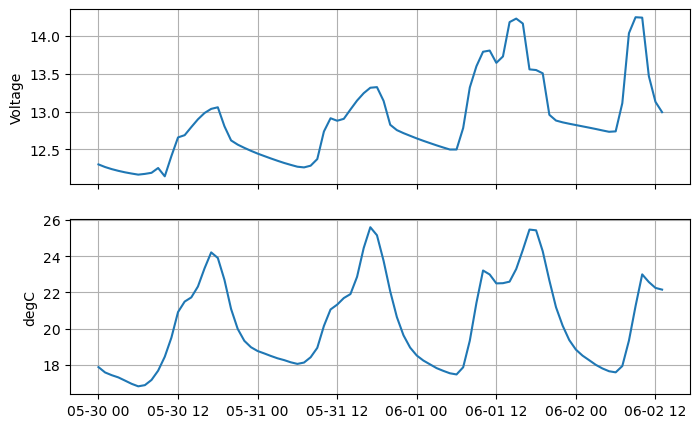

In [116]:
## DATALOGGER
df_list = [] # init empty dataframe 

for x in datlog:
    loop = pd.read_csv(x,
                       sep=',',
                       names=['time','record','BattV','PTemp'],
                       header=3,
                       parse_dates=[0]) 
    df_list.append(loop)

dl = pd.concat(df_list,ignore_index=True)   # dl for datalogger sensor values 
dl = dl.set_index('time')                   # set the time column to be the index
dl = dl.loc['2023-05-30':'2023-06-03']      # slicing dates I want
dl_hr = dl.resample('1H').mean()

fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(8,5),sharex=True)

ax[0].plot(dl_hr.index,dl_hr.BattV)
ax[0].set_ylabel('Voltage')
ax[0].grid()

ax[1].plot(dl_hr.index,dl_hr.PTemp)
ax[1].set_ylabel('degC')
ax[1].grid();

# fig,ax=plt.subplots(figsize=(8,5))
# ax.plot(dl.index,dl.BattV,label='Battery Voltage')
# ax.set_ylabel('Voltage')
# ax2=ax.twinx()
# ax2.plot(dl.index,dl.PTemp,label='Panel Temp',color='red')
# ax2.set_ylabel('degC')
# ax.legend()
# ax2.legend()

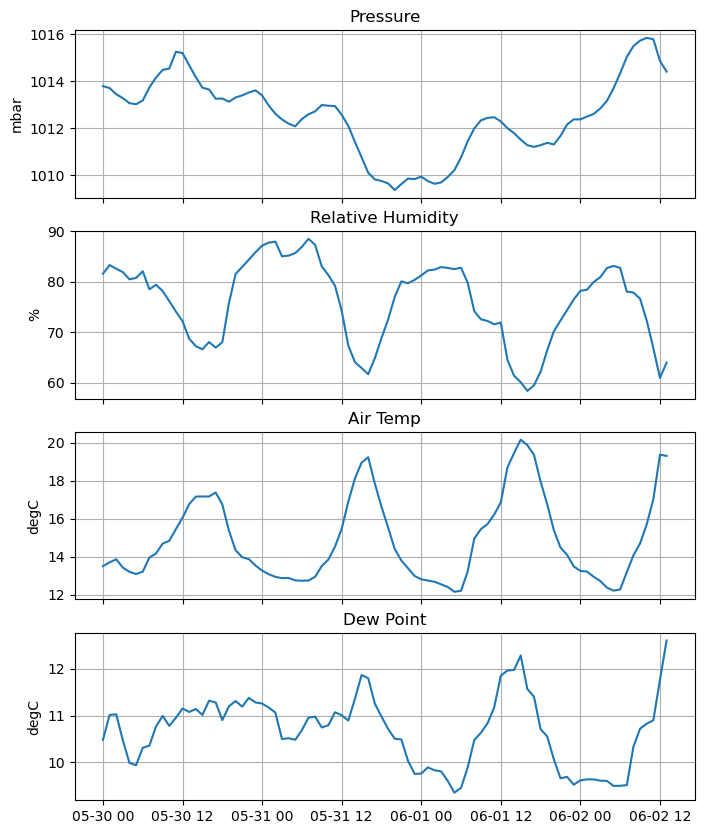

In [115]:
## MET STATION
df_list = [] # init empty dataframe 

for x in ms3:
    loop = pd.read_csv(x,
                       sep=',',
                       names=["time","record","BP","RH","AirTemp","DP"],
                       header=3,
                       parse_dates=[0]) 
    df_list.append(loop)

dl = pd.concat(df_list,ignore_index=True)   
dl = dl.set_index('time')                   # set the time column to be the index
dl = dl.loc['2023-05-30':'2023-06-03']      # slicing dates I want
dl_hr = dl.resample('1H').mean()

fig,ax=plt.subplots(ncols=1,nrows=4,figsize=(8,10),sharex=ax[0])

ax[0].plot(dl_hr.index,dl_hr.BP)
ax[0].set_ylabel('mbar')
ax[0].set_title('Pressure')

ax[1].plot(dl_hr.index,dl_hr.RH)
ax[1].set_ylabel('%')
ax[1].set_title('Relative Humidity')

ax[2].plot(dl_hr.index,dl_hr.AirTemp)
ax[2].set_ylabel('degC')
ax[2].set_title('Air Temp')

ax[3].plot(dl_hr.index,dl_hr.DP)
ax[3].set_ylabel('degC')
ax[3].set_title('Dew Point')

ax[0].grid(),ax[1].grid(),ax[2].grid(),ax[3].grid();

# THIS IS JUST TO SEE THE DIFFERENCE BETWEEN THE HR BIN AVERAGES AND NOT 
# here to see the diff to show people

# fig,ax=plt.subplots(ncols=1,nrows=4,figsize=(8,10),sharex=ax[0])

# ax[0].plot(dl.index,dl.BP)
# ax[0].set_ylabel('mbar')
# ax[0].set_title('Pressure')

# ax[1].plot(dl.index,dl.RH)
# ax[1].set_ylabel('%')
# ax[1].set_title('Relative Humidity')

# ax[2].plot(dl.index,dl.AirTemp)
# ax[2].set_ylabel('degC')
# ax[2].set_title('Air Temp')

# ax[3].plot(dl.index,dl.DP)
# ax[3].set_ylabel('degC')
# ax[3].set_title('Dew Point')

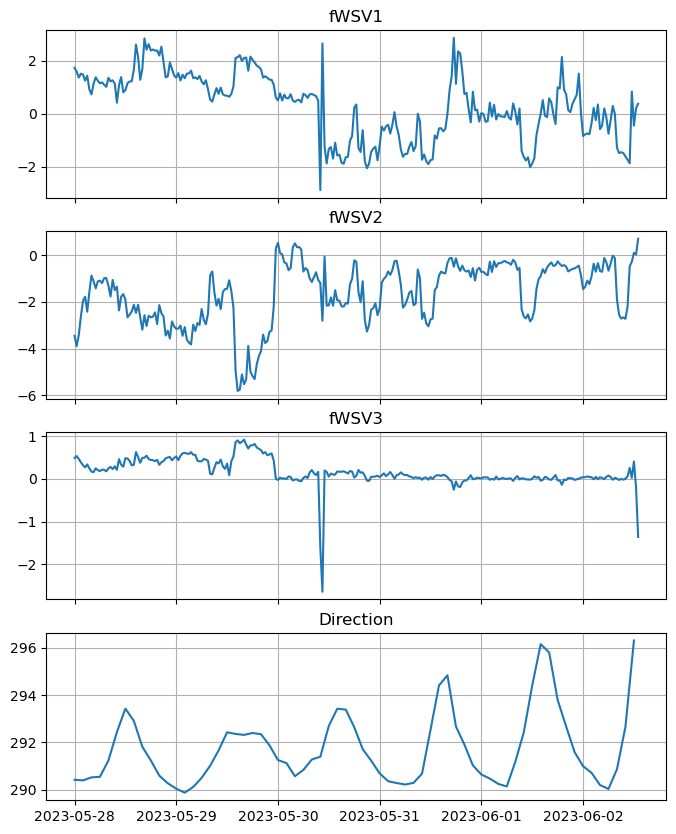

In [4]:
## WS
df_list = [] # init empty dataframe 

for x in ws:
    loop = pd.read_csv(x,sep=',',
                       names=["time","record","fWSV1","fWSV2","fWSV3","fWSC","iWSDiag","iWSValue"],
                       header=3,
                       parse_dates=[0]) 
    df_list.append(loop)

dl = pd.concat(df_list,ignore_index=True)   
dl = dl.set_index('time')                   # set the time column to be the index
dl = dl.loc['2023-05-28':'2023-06-03']      # slicing dates I want

dl_hhr = dl.resample('30MIN').mean()
dl_2hr = dl.resample('2H').mean()

fig,ax=plt.subplots(ncols=1,nrows=4,figsize=(8,10),sharex=ax[0])

ax[0].plot(dl_hhr.index,dl_hhr.fWSV1)
#ax[0].set_ylabel('Wind Speed') dunno
ax[0].set_title('fWSV1')

ax[1].plot(dl_hhr.index,dl_hhr.fWSV2)
ax[1].set_title('fWSV2')

ax[2].plot(dl_hhr.index,dl_hhr.fWSV3)
ax[2].set_title('fWSV3')

ax[3].plot(dl_2hr.index,dl_2hr.fWSC)
ax[3].set_title('Direction')

ax[0].grid(),ax[1].grid(),ax[2].grid(),ax[3].grid();

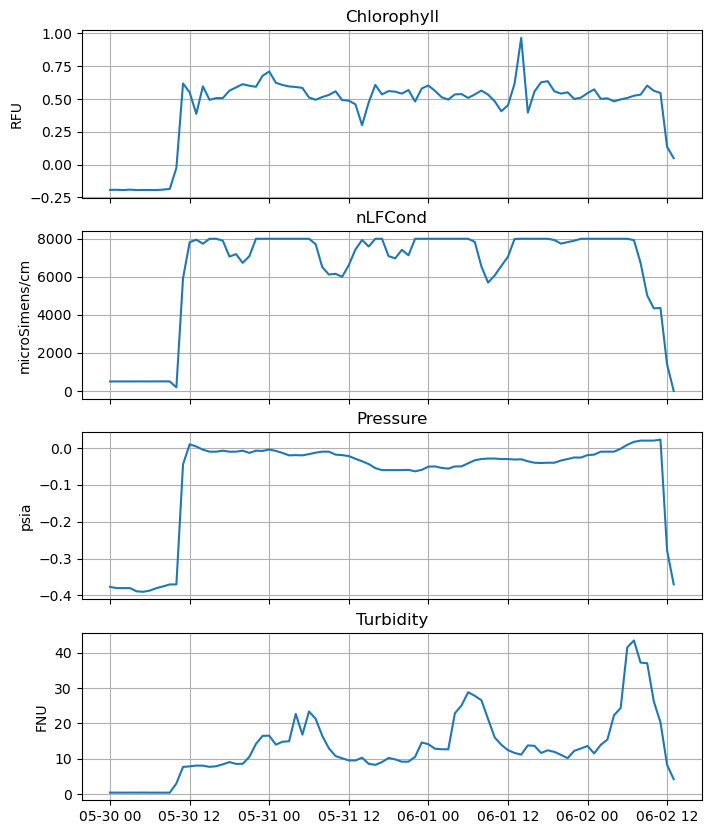

In [102]:
## EXO
dfexo_list = [] # init empty dataframe 

for x in exo:
    loop = pd.read_csv(x,
                       sep=',',
                       names=["time","record","Chloro","nLFCond","Pressure",
                       "Turbidity","Temp","Cond","D_OX","Sal","TSS","VerticalPosition",
                       "Depth","D_OX2","SpCond","WiperPosition","BPower","fDOM","D_OX3",
                       "Phycoerythrin","pH","CablePower","fDOM2","ORP","TDS","pH2"],
                       header=2,
                       na_values='NaN',
                       parse_dates=[0]) 
    dfexo_list.append(loop)

dlexo    = pd.concat(dfexo_list,ignore_index=True)   
dlexo    = dlexo.set_index('time')                          # set the time column to be the index
dlexo    = dlexo.loc['2023-05-30':'2023-06-03']             # slicing dates I want
dlexo_hr = dlexo.astype('float').resample('1H').mean()      # but what is the astype doing really

# for key in dlexo_hr:
#     print(key, dlexo_hr[key].shape)

fig,ax = plt.subplots(ncols=1,nrows=4,figsize=(8,10),sharex=True)

ax[0].plot(dlexo_hr.index,dlexo_hr.Chloro)
ax[0].set_ylabel('RFU')
ax[0].set_title('Chlorophyll')

ax[1].plot(dlexo_hr.index,dlexo_hr.nLFCond)
ax[1].set_ylabel('microSimens/cm')
ax[1].set_title('nLFCond')

ax[2].plot(dlexo_hr.index,dlexo_hr.Pressure)
ax[2].set_ylabel('psia')
ax[2].set_title('Pressure')

ax[3].plot(dlexo_hr.index,dlexo_hr.Turbidity)
ax[3].set_ylabel('FNU')
ax[3].set_title('Turbidity')

ax[0].grid(),ax[1].grid(),ax[2].grid(),ax[3].grid();


In [69]:
## PAR
## The atmo and paraq1 sensors were swapped in the wiring during the test

# init PAR top
dfaq1_list = [] # init empty dataframe 
for x in paratmo: # UNSWAPING PAR1 AND ATMO, real paraq1 data is in atmo from datalogger
    loop = pd.read_csv(x,sep=',',names=["time","record","PAR_aqua1_Den","PAR_aqua1_Tot"],
                       header=3,
                       parse_dates=[0],
                       encoding = "utf-8") 
    dfaq1_list.append(loop)

dl1 = pd.concat(dfaq1_list,ignore_index=True)       
dl1 = dl1.set_index('time')                         # set the time column to be the index
dl1 = dl1.loc['2023-05-30':'2023-06-01']            # slicing dates I want
dl1_hr = dl1.astype('int64').resample('1H').mean()  # but what is the astype doing really

# init PAR bottom
dfaq2_list = [] # init empty dataframe 
for y in paraq2:
    loop = pd.read_csv(y,
                       sep=',',
                       names=["time","record","PAR_aqua2_Den","PAR_aqua2_Tot"],
                       header=3,
                       parse_dates=[0],
                       encoding = "utf-8") 
    dfaq2_list.append(loop)

dl2 = pd.concat(dfaq2_list,ignore_index=True)         
dl2 = dl2.set_index('time')                           # set the time column to be the index
dl2 = dl2.loc['2023-05-30':'2023-06-01']              # slicing dates I want
dl2_hr = dl2.astype('int64').resample('1H').mean()    # but what is the astype doing really

# init PAR atmo
dfatmo_list = [] # init empty dataframe 
for y in paraq1: # UNSWAPPING PAR1 AND ATMO, real atmo data is in paraq1 from datalogger
    loop = pd.read_csv(y,
                       sep=',',
                       names=["time","record","PAR_atmo_Den","PAR_atmo_Tot"],
                       header=3,
                       parse_dates=[0],
                       encoding = "utf-8") 
    dfatmo_list.append(loop)

dl3 = pd.concat(dfatmo_list,ignore_index=True)        
dl3 = dl3.set_index('time')                           # set the time column to be the index
dl3 = dl3.loc['2023-05-30':'2023-06-01']              # slicing dates I want
dl3_hr = dl3.astype('int64').resample('1H').mean()    # but what is the astype doing really

# fig,ax=plt.subplots(ncols=1,nrows=2,figsize=(8,5))
# ax[0].plot(dl_hr.index,dl_hr.PAR_aqua1_Tot)
# ax[0].set_ylabel('aqua1')
# ax[1].plot(dl2_hr.index,dl2_hr.PAR_aqua2_Tot)
# ax[1].set_ylabel('aqua2')

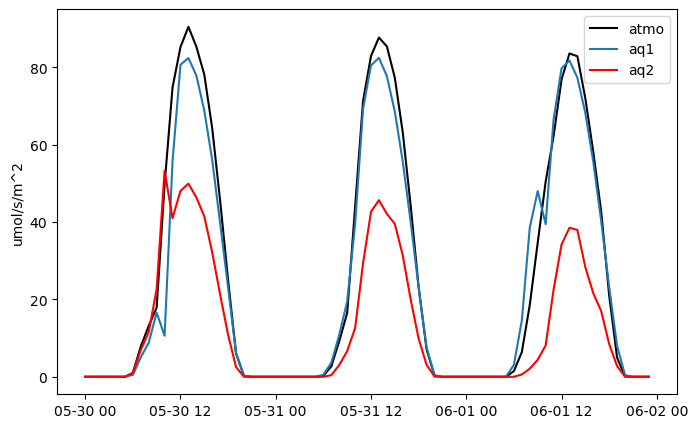

In [112]:
# plot three PAR sensors on same plot
fig,ax=plt.subplots(figsize=(8,5))
ax.plot(dl3_hr.index,dl3_hr.PAR_atmo_Tot,label='atmo',color='black')
ax.plot(dl1_hr.index,dl1_hr.PAR_aqua1_Tot,label='aq1')
ax.plot(dl2_hr.index,dl2_hr.PAR_aqua2_Tot,label='aq2',color='red')
ax.set_ylabel('umol/s/m^2')
ax.legend();

<Axes: xlabel='time'>

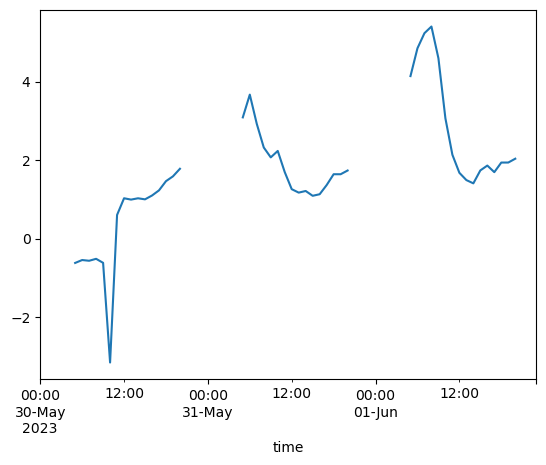

In [111]:
# this is not right
Lz = dl2_hr.PAR_aqua2_Den # deeper one 
Lo = dl1_hr.PAR_aqua1_Den # upper one 
Z = 0.5

atten = -(np.log(Lz/Lo))/Z
atten.plot();